In [10]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [11]:
def read_history_data():
    paths = os.listdir("variables/")
    history_list: list[defaultdict(list)] = []
    for path in paths: 
        with open("variables/"+path, "rb") as f:
            history_list.append(pickle.load(f))
    return history_list
history_list = read_history_data()

In [22]:
print(history_list[0].keys())
history = history_list[0]
x_axis = 1+np.arange(len(history["data_size"]))

dict_keys(['accuracy', 'precision', 'recall', 'F1', 'error_rate', 'n_errors', 'data_size', 'n_error'])
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


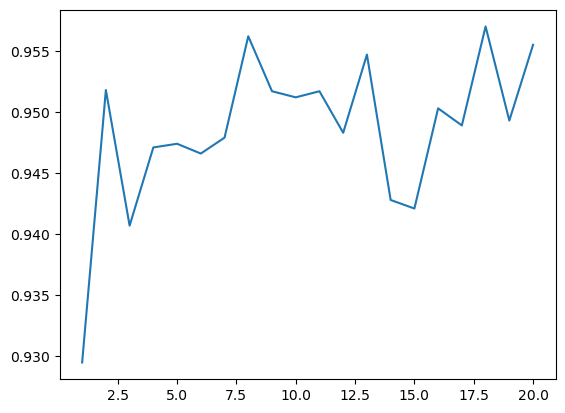

In [16]:
plt.plot(x_axis, history["accuracy"])
plt.show()

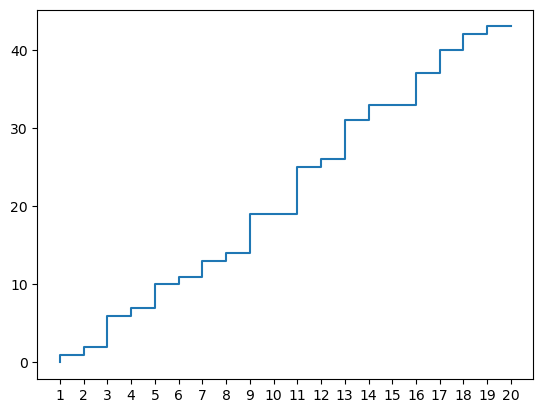

In [24]:
plt.step(x_axis, history["n_errors"])
plt.xticks(x_axis)
plt.show()